In [60]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import time
import os
import cv2

img_height = 64
img_width = 64
batch_size = 32

In [27]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='training_data/',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

Found 5064 files belonging to 2 classes.


In [28]:
val_ds = keras.utils.image_dataset_from_directory(
    directory='validation_data/',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

Found 967 files belonging to 2 classes.


In [29]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='test_data/',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

Found 563 files belonging to 2 classes.


In [30]:
class_names = train_ds.class_names
print(class_names)

['defect', 'normal']


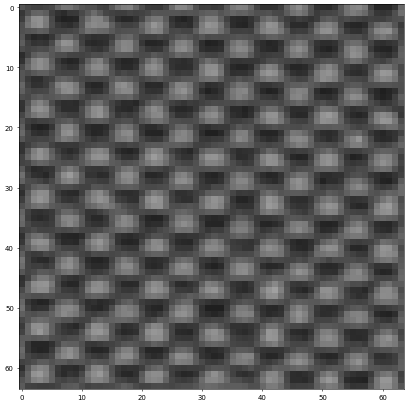

tf.Tensor(
[[[ 83.  83.  83.]
  [ 72.  72.  72.]
  [ 66.  66.  66.]
  ...
  [ 39.  39.  39.]
  [ 54.  54.  54.]
  [104. 104. 104.]]

 [[ 55.  55.  55.]
  [ 78.  78.  78.]
  [ 99.  99.  99.]
  ...
  [ 56.  56.  56.]
  [ 79.  79.  79.]
  [111. 111. 111.]]

 [[ 62.  62.  62.]
  [109. 109. 109.]
  [142. 142. 142.]
  ...
  [ 72.  72.  72.]
  [ 79.  79.  79.]
  [ 81.  81.  81.]]

 ...

 [[ 64.  64.  64.]
  [100. 100. 100.]
  [146. 146. 146.]
  ...
  [121. 121. 121.]
  [101. 101. 101.]
  [ 63.  63.  63.]]

 [[ 83.  83.  83.]
  [ 98.  98.  98.]
  [128. 128. 128.]
  ...
  [150. 150. 150.]
  [118. 118. 118.]
  [ 68.  68.  68.]]

 [[ 90.  90.  90.]
  [ 66.  66.  66.]
  [ 64.  64.  64.]
  ...
  [143. 143. 143.]
  [116. 116. 116.]
  [ 84.  84.  84.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


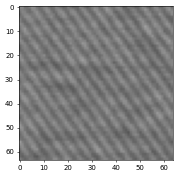

tf.Tensor(
[[[137. 137. 137.]
  [136. 136. 136.]
  [113. 113. 113.]
  ...
  [138. 138. 138.]
  [140. 140. 140.]
  [113. 113. 113.]]

 [[127. 127. 127.]
  [131. 131. 131.]
  [122. 122. 122.]
  ...
  [132. 132. 132.]
  [146. 146. 146.]
  [130. 130. 130.]]

 [[118. 118. 118.]
  [134. 134. 134.]
  [131. 131. 131.]
  ...
  [118. 118. 118.]
  [127. 127. 127.]
  [138. 138. 138.]]

 ...

 [[103. 103. 103.]
  [105. 105. 105.]
  [124. 124. 124.]
  ...
  [ 97.  97.  97.]
  [108. 108. 108.]
  [118. 118. 118.]]

 [[105. 105. 105.]
  [ 97.  97.  97.]
  [108. 108. 108.]
  ...
  [113. 113. 113.]
  [107. 107. 107.]
  [109. 109. 109.]]

 [[125. 125. 125.]
  [110. 110. 110.]
  [101. 101. 101.]
  ...
  [128. 128. 128.]
  [107. 107. 107.]
  [101. 101. 101.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


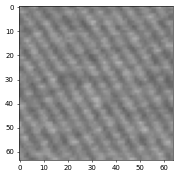

tf.Tensor(
[[[160. 160. 160.]
  [129. 129. 129.]
  [119. 119. 119.]
  ...
  [130. 130. 130.]
  [137. 137. 137.]
  [145. 145. 145.]]

 [[141. 141. 141.]
  [140. 140. 140.]
  [131. 131. 131.]
  ...
  [123. 123. 123.]
  [117. 117. 117.]
  [126. 126. 126.]]

 [[150. 150. 150.]
  [158. 158. 158.]
  [146. 146. 146.]
  ...
  [122. 122. 122.]
  [130. 130. 130.]
  [136. 136. 136.]]

 ...

 [[145. 145. 145.]
  [141. 141. 141.]
  [124. 124. 124.]
  ...
  [116. 116. 116.]
  [117. 117. 117.]
  [136. 136. 136.]]

 [[149. 149. 149.]
  [146. 146. 146.]
  [119. 119. 119.]
  ...
  [116. 116. 116.]
  [111. 111. 111.]
  [128. 128. 128.]]

 [[138. 138. 138.]
  [146. 146. 146.]
  [139. 139. 139.]
  ...
  [127. 127. 127.]
  [114. 114. 114.]
  [124. 124. 124.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


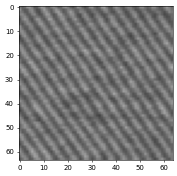

tf.Tensor(
[[[122. 122. 122.]
  [ 97.  97.  97.]
  [111. 111. 111.]
  ...
  [152. 152. 152.]
  [132. 132. 132.]
  [108. 108. 108.]]

 [[144. 144. 144.]
  [ 99.  99.  99.]
  [ 88.  88.  88.]
  ...
  [135. 135. 135.]
  [135. 135. 135.]
  [114. 114. 114.]]

 [[126. 126. 126.]
  [115. 115. 115.]
  [ 90.  90.  90.]
  ...
  [101. 101. 101.]
  [135. 135. 135.]
  [121. 121. 121.]]

 ...

 [[131. 131. 131.]
  [132. 132. 132.]
  [107. 107. 107.]
  ...
  [104. 104. 104.]
  [134. 134. 134.]
  [126. 126. 126.]]

 [[112. 112. 112.]
  [139. 139. 139.]
  [131. 131. 131.]
  ...
  [ 92.  92.  92.]
  [119. 119. 119.]
  [122. 122. 122.]]

 [[ 91.  91.  91.]
  [114. 114. 114.]
  [139. 139. 139.]
  ...
  [ 91.  91.  91.]
  [ 85.  85.  85.]
  [120. 120. 120.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


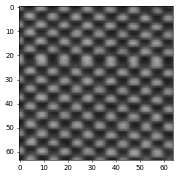

tf.Tensor(
[[[124. 124. 124.]
  [ 96.  96.  96.]
  [ 49.  49.  49.]
  ...
  [ 49.  49.  49.]
  [ 54.  54.  54.]
  [ 59.  59.  59.]]

 [[ 98.  98.  98.]
  [ 88.  88.  88.]
  [ 60.  60.  60.]
  ...
  [ 34.  34.  34.]
  [ 32.  32.  32.]
  [ 43.  43.  43.]]

 [[ 40.  40.  40.]
  [ 47.  47.  47.]
  [ 70.  70.  70.]
  ...
  [ 53.  53.  53.]
  [ 57.  57.  57.]
  [ 61.  61.  61.]]

 ...

 [[ 90.  90.  90.]
  [ 90.  90.  90.]
  [ 73.  73.  73.]
  ...
  [ 48.  48.  48.]
  [ 50.  50.  50.]
  [ 58.  58.  58.]]

 [[ 33.  33.  33.]
  [ 42.  42.  42.]
  [ 63.  63.  63.]
  ...
  [ 60.  60.  60.]
  [ 64.  64.  64.]
  [ 77.  77.  77.]]

 [[ 34.  34.  34.]
  [ 43.  43.  43.]
  [ 82.  82.  82.]
  ...
  [ 78.  78.  78.]
  [ 91.  91.  91.]
  [ 81.  81.  81.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


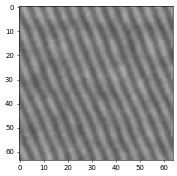

tf.Tensor(
[[[128. 128. 128.]
  [163. 163. 163.]
  [173. 173. 173.]
  ...
  [119. 119. 119.]
  [147. 147. 147.]
  [151. 151. 151.]]

 [[114. 114. 114.]
  [152. 152. 152.]
  [171. 171. 171.]
  ...
  [107. 107. 107.]
  [138. 138. 138.]
  [160. 160. 160.]]

 [[107. 107. 107.]
  [138. 138. 138.]
  [171. 171. 171.]
  ...
  [103. 103. 103.]
  [113. 113. 113.]
  [157. 157. 157.]]

 ...

 [[131. 131. 131.]
  [162. 162. 162.]
  [164. 164. 164.]
  ...
  [114. 114. 114.]
  [145. 145. 145.]
  [148. 148. 148.]]

 [[114. 114. 114.]
  [153. 153. 153.]
  [159. 159. 159.]
  ...
  [110. 110. 110.]
  [135. 135. 135.]
  [153. 153. 153.]]

 [[ 95.  95.  95.]
  [132. 132. 132.]
  [156. 156. 156.]
  ...
  [107. 107. 107.]
  [122. 122. 122.]
  [150. 150. 150.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


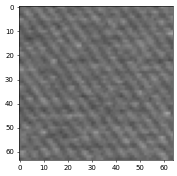

tf.Tensor(
[[[100. 100. 100.]
  [111. 111. 111.]
  [112. 112. 112.]
  ...
  [123. 123. 123.]
  [112. 112. 112.]
  [119. 119. 119.]]

 [[104. 104. 104.]
  [113. 113. 113.]
  [116. 116. 116.]
  ...
  [121. 121. 121.]
  [109. 109. 109.]
  [112. 112. 112.]]

 [[ 97.  97.  97.]
  [106. 106. 106.]
  [128. 128. 128.]
  ...
  [123. 123. 123.]
  [115. 115. 115.]
  [116. 116. 116.]]

 ...

 [[130. 130. 130.]
  [140. 140. 140.]
  [121. 121. 121.]
  ...
  [104. 104. 104.]
  [104. 104. 104.]
  [114. 114. 114.]]

 [[113. 113. 113.]
  [125. 125. 125.]
  [121. 121. 121.]
  ...
  [125. 125. 125.]
  [100. 100. 100.]
  [ 97.  97.  97.]]

 [[ 87.  87.  87.]
  [ 99.  99.  99.]
  [108. 108. 108.]
  ...
  [130. 130. 130.]
  [100. 100. 100.]
  [ 92.  92.  92.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


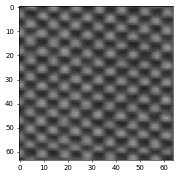

tf.Tensor(
[[[ 57.  57.  57.]
  [ 54.  54.  54.]
  [ 75.  75.  75.]
  ...
  [ 88.  88.  88.]
  [ 87.  87.  87.]
  [ 83.  83.  83.]]

 [[ 91.  91.  91.]
  [ 88.  88.  88.]
  [ 74.  74.  74.]
  ...
  [119. 119. 119.]
  [109. 109. 109.]
  [ 89.  89.  89.]]

 [[120. 120. 120.]
  [104. 104. 104.]
  [ 71.  71.  71.]
  ...
  [138. 138. 138.]
  [134. 134. 134.]
  [102. 102. 102.]]

 ...

 [[134. 134. 134.]
  [110. 110. 110.]
  [ 76.  76.  76.]
  ...
  [102. 102. 102.]
  [104. 104. 104.]
  [ 79.  79.  79.]]

 [[105. 105. 105.]
  [ 94.  94.  94.]
  [ 84.  84.  84.]
  ...
  [ 52.  52.  52.]
  [ 51.  51.  51.]
  [ 55.  55.  55.]]

 [[ 51.  51.  51.]
  [ 56.  56.  56.]
  [ 80.  80.  80.]
  ...
  [ 45.  45.  45.]
  [ 41.  41.  41.]
  [ 56.  56.  56.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


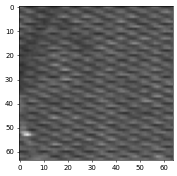

tf.Tensor(
[[[111. 111. 111.]
  [100. 100. 100.]
  [ 77.  77.  77.]
  ...
  [ 59.  59.  59.]
  [ 61.  61.  61.]
  [ 72.  72.  72.]]

 [[ 79.  79.  79.]
  [ 91.  91.  91.]
  [101. 101. 101.]
  ...
  [102. 102. 102.]
  [ 86.  86.  86.]
  [ 77.  77.  77.]]

 [[ 63.  63.  63.]
  [ 71.  71.  71.]
  [ 83.  83.  83.]
  ...
  [128. 128. 128.]
  [114. 114. 114.]
  [ 98.  98.  98.]]

 ...

 [[ 90.  90.  90.]
  [ 81.  81.  81.]
  [ 73.  73.  73.]
  ...
  [ 89.  89.  89.]
  [ 92.  92.  92.]
  [ 92.  92.  92.]]

 [[109. 109. 109.]
  [104. 104. 104.]
  [ 97.  97.  97.]
  ...
  [ 69.  69.  69.]
  [ 65.  65.  65.]
  [ 66.  66.  66.]]

 [[ 75.  75.  75.]
  [ 79.  79.  79.]
  [ 76.  76.  76.]
  ...
  [110. 110. 110.]
  [106. 106. 106.]
  [ 85.  85.  85.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


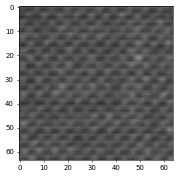

tf.Tensor(
[[[ 86.  86.  86.]
  [ 83.  83.  83.]
  [ 78.  78.  78.]
  ...
  [ 94.  94.  94.]
  [ 85.  85.  85.]
  [ 77.  77.  77.]]

 [[ 71.  71.  71.]
  [ 73.  73.  73.]
  [ 67.  67.  67.]
  ...
  [ 72.  72.  72.]
  [ 69.  69.  69.]
  [ 75.  75.  75.]]

 [[ 67.  67.  67.]
  [ 74.  74.  74.]
  [ 71.  71.  71.]
  ...
  [ 61.  61.  61.]
  [ 61.  61.  61.]
  [ 67.  67.  67.]]

 ...

 [[ 78.  78.  78.]
  [ 95.  95.  95.]
  [ 97.  97.  97.]
  ...
  [ 70.  70.  70.]
  [ 64.  64.  64.]
  [ 64.  64.  64.]]

 [[ 98.  98.  98.]
  [ 88.  88.  88.]
  [ 85.  85.  85.]
  ...
  [ 76.  76.  76.]
  [ 85.  85.  85.]
  [ 91.  91.  91.]]

 [[ 87.  87.  87.]
  [ 69.  69.  69.]
  [ 64.  64.  64.]
  ...
  [ 77.  77.  77.]
  [103. 103. 103.]
  [105. 105. 105.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


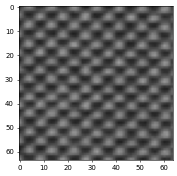

tf.Tensor(
[[[ 58.  58.  58.]
  [ 81.  81.  81.]
  [112. 112. 112.]
  ...
  [139. 139. 139.]
  [110. 110. 110.]
  [ 70.  70.  70.]]

 [[ 76.  76.  76.]
  [ 92.  92.  92.]
  [ 98.  98.  98.]
  ...
  [134. 134. 134.]
  [108. 108. 108.]
  [ 76.  76.  76.]]

 [[100. 100. 100.]
  [ 88.  88.  88.]
  [ 60.  60.  60.]
  ...
  [110. 110. 110.]
  [ 95.  95.  95.]
  [ 81.  81.  81.]]

 ...

 [[ 60.  60.  60.]
  [ 60.  60.  60.]
  [ 61.  61.  61.]
  ...
  [133. 133. 133.]
  [111. 111. 111.]
  [ 86.  86.  86.]]

 [[ 98.  98.  98.]
  [ 74.  74.  74.]
  [ 47.  47.  47.]
  ...
  [ 78.  78.  78.]
  [ 76.  76.  76.]
  [ 77.  77.  77.]]

 [[123. 123. 123.]
  [ 85.  85.  85.]
  [ 55.  55.  55.]
  ...
  [ 51.  51.  51.]
  [ 48.  48.  48.]
  [ 77.  77.  77.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


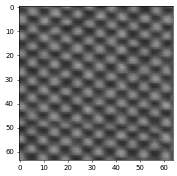

tf.Tensor(
[[[ 78.  78.  78.]
  [ 81.  81.  81.]
  [ 90.  90.  90.]
  ...
  [ 73.  73.  73.]
  [ 80.  80.  80.]
  [ 84.  84.  84.]]

 [[ 55.  55.  55.]
  [ 55.  55.  55.]
  [ 62.  62.  62.]
  ...
  [ 44.  44.  44.]
  [ 45.  45.  45.]
  [ 58.  58.  58.]]

 [[ 67.  67.  67.]
  [ 71.  71.  71.]
  [ 69.  69.  69.]
  ...
  [ 58.  58.  58.]
  [ 59.  59.  59.]
  [ 70.  70.  70.]]

 ...

 [[127. 127. 127.]
  [107. 107. 107.]
  [ 81.  81.  81.]
  ...
  [136. 136. 136.]
  [112. 112. 112.]
  [ 74.  74.  74.]]

 [[136. 136. 136.]
  [122. 122. 122.]
  [ 89.  89.  89.]
  ...
  [145. 145. 145.]
  [117. 117. 117.]
  [ 83.  83.  83.]]

 [[134. 134. 134.]
  [126. 126. 126.]
  [ 97.  97.  97.]
  ...
  [123. 123. 123.]
  [111. 111. 111.]
  [ 83.  83.  83.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


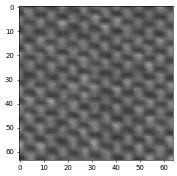

tf.Tensor(
[[[104. 104. 104.]
  [ 98.  98.  98.]
  [ 91.  91.  91.]
  ...
  [ 84.  84.  84.]
  [ 78.  78.  78.]
  [ 81.  81.  81.]]

 [[ 84.  84.  84.]
  [ 89.  89.  89.]
  [122. 122. 122.]
  ...
  [ 98.  98.  98.]
  [ 82.  82.  82.]
  [ 72.  72.  72.]]

 [[ 57.  57.  57.]
  [ 73.  73.  73.]
  [120. 120. 120.]
  ...
  [ 95.  95.  95.]
  [ 93.  93.  93.]
  [ 94.  94.  94.]]

 ...

 [[ 84.  84.  84.]
  [ 89.  89.  89.]
  [112. 112. 112.]
  ...
  [ 79.  79.  79.]
  [ 78.  78.  78.]
  [ 78.  78.  78.]]

 [[ 61.  61.  61.]
  [ 63.  63.  63.]
  [ 88.  88.  88.]
  ...
  [ 90.  90.  90.]
  [104. 104. 104.]
  [126. 126. 126.]]

 [[ 59.  59.  59.]
  [ 52.  52.  52.]
  [ 79.  79.  79.]
  ...
  [101. 101. 101.]
  [134. 134. 134.]
  [163. 163. 163.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


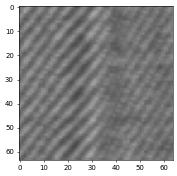

tf.Tensor(
[[[122. 122. 122.]
  [117. 117. 117.]
  [138. 138. 138.]
  ...
  [114. 114. 114.]
  [134. 134. 134.]
  [138. 138. 138.]]

 [[114. 114. 114.]
  [137. 137. 137.]
  [161. 161. 161.]
  ...
  [130. 130. 130.]
  [143. 143. 143.]
  [125. 125. 125.]]

 [[116. 116. 116.]
  [134. 134. 134.]
  [163. 163. 163.]
  ...
  [123. 123. 123.]
  [133. 133. 133.]
  [118. 118. 118.]]

 ...

 [[145. 145. 145.]
  [119. 119. 119.]
  [ 96.  96.  96.]
  ...
  [102. 102. 102.]
  [102. 102. 102.]
  [123. 123. 123.]]

 [[128. 128. 128.]
  [ 94.  94.  94.]
  [ 88.  88.  88.]
  ...
  [104. 104. 104.]
  [116. 116. 116.]
  [122. 122. 122.]]

 [[105. 105. 105.]
  [ 95.  95.  95.]
  [115. 115. 115.]
  ...
  [107. 107. 107.]
  [125. 125. 125.]
  [133. 133. 133.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


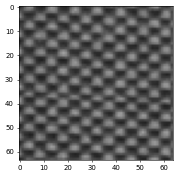

tf.Tensor(
[[[ 48.  48.  48.]
  [ 66.  66.  66.]
  [103. 103. 103.]
  ...
  [ 62.  62.  62.]
  [ 72.  72.  72.]
  [ 99.  99.  99.]]

 [[ 71.  71.  71.]
  [ 78.  78.  78.]
  [105. 105. 105.]
  ...
  [ 94.  94.  94.]
  [ 94.  94.  94.]
  [ 91.  91.  91.]]

 [[ 95.  95.  95.]
  [ 75.  75.  75.]
  [ 68.  68.  68.]
  ...
  [139. 139. 139.]
  [113. 113. 113.]
  [ 71.  71.  71.]]

 ...

 [[126. 126. 126.]
  [ 84.  84.  84.]
  [ 56.  56.  56.]
  ...
  [140. 140. 140.]
  [128. 128. 128.]
  [ 88.  88.  88.]]

 [[ 89.  89.  89.]
  [ 72.  72.  72.]
  [ 67.  67.  67.]
  ...
  [ 73.  73.  73.]
  [ 91.  91.  91.]
  [ 81.  81.  81.]]

 [[ 42.  42.  42.]
  [ 52.  52.  52.]
  [ 71.  71.  71.]
  ...
  [ 38.  38.  38.]
  [ 51.  51.  51.]
  [ 88.  88.  88.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


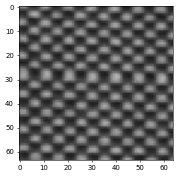

tf.Tensor(
[[[132. 132. 132.]
  [133. 133. 133.]
  [138. 138. 138.]
  ...
  [ 66.  66.  66.]
  [ 40.  40.  40.]
  [ 33.  33.  33.]]

 [[ 73.  73.  73.]
  [ 76.  76.  76.]
  [ 75.  75.  75.]
  ...
  [ 77.  77.  77.]
  [ 42.  42.  42.]
  [ 35.  35.  35.]]

 [[ 42.  42.  42.]
  [ 35.  35.  35.]
  [ 39.  39.  39.]
  ...
  [ 76.  76.  76.]
  [ 53.  53.  53.]
  [ 51.  51.  51.]]

 ...

 [[ 47.  47.  47.]
  [ 33.  33.  33.]
  [ 29.  29.  29.]
  ...
  [105. 105. 105.]
  [ 72.  72.  72.]
  [ 61.  61.  61.]]

 [[ 50.  50.  50.]
  [ 42.  42.  42.]
  [ 40.  40.  40.]
  ...
  [ 50.  50.  50.]
  [ 60.  60.  60.]
  [ 72.  72.  72.]]

 [[ 68.  68.  68.]
  [ 62.  62.  62.]
  [ 59.  59.  59.]
  ...
  [ 36.  36.  36.]
  [ 73.  73.  73.]
  [110. 110. 110.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


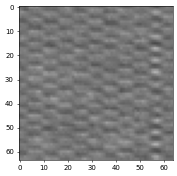

tf.Tensor(
[[[109. 109. 109.]
  [107. 107. 107.]
  [100. 100. 100.]
  ...
  [127. 127. 127.]
  [123. 123. 123.]
  [117. 117. 117.]]

 [[121. 121. 121.]
  [107. 107. 107.]
  [ 93.  93.  93.]
  ...
  [120. 120. 120.]
  [119. 119. 119.]
  [117. 117. 117.]]

 [[141. 141. 141.]
  [143. 143. 143.]
  [130. 130. 130.]
  ...
  [107. 107. 107.]
  [109. 109. 109.]
  [103. 103. 103.]]

 ...

 [[ 99.  99.  99.]
  [101. 101. 101.]
  [ 97.  97.  97.]
  ...
  [104. 104. 104.]
  [111. 111. 111.]
  [115. 115. 115.]]

 [[118. 118. 118.]
  [118. 118. 118.]
  [134. 134. 134.]
  ...
  [ 96.  96.  96.]
  [ 96.  96.  96.]
  [101. 101. 101.]]

 [[131. 131. 131.]
  [129. 129. 129.]
  [133. 133. 133.]
  ...
  [109. 109. 109.]
  [109. 109. 109.]
  [110. 110. 110.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


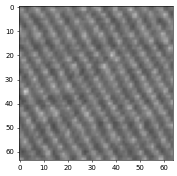

tf.Tensor(
[[[121. 121. 121.]
  [114. 114. 114.]
  [ 97.  97.  97.]
  ...
  [ 93.  93.  93.]
  [109. 109. 109.]
  [119. 119. 119.]]

 [[141. 141. 141.]
  [151. 151. 151.]
  [117. 117. 117.]
  ...
  [ 98.  98.  98.]
  [106. 106. 106.]
  [112. 112. 112.]]

 [[132. 132. 132.]
  [132. 132. 132.]
  [118. 118. 118.]
  ...
  [129. 129. 129.]
  [100. 100. 100.]
  [ 92.  92.  92.]]

 ...

 [[102. 102. 102.]
  [ 90.  90.  90.]
  [ 96.  96.  96.]
  ...
  [103. 103. 103.]
  [114. 114. 114.]
  [135. 135. 135.]]

 [[115. 115. 115.]
  [102. 102. 102.]
  [ 97.  97.  97.]
  ...
  [ 99.  99.  99.]
  [103. 103. 103.]
  [116. 116. 116.]]

 [[149. 149. 149.]
  [139. 139. 139.]
  [102. 102. 102.]
  ...
  [102. 102. 102.]
  [109. 109. 109.]
  [114. 114. 114.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


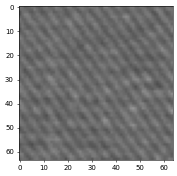

tf.Tensor(
[[[118. 118. 118.]
  [112. 112. 112.]
  [ 97.  97.  97.]
  ...
  [118. 118. 118.]
  [117. 117. 117.]
  [109. 109. 109.]]

 [[108. 108. 108.]
  [111. 111. 111.]
  [107. 107. 107.]
  ...
  [108. 108. 108.]
  [118. 118. 118.]
  [116. 116. 116.]]

 [[ 86.  86.  86.]
  [110. 110. 110.]
  [112. 112. 112.]
  ...
  [ 89.  89.  89.]
  [ 99.  99.  99.]
  [111. 111. 111.]]

 ...

 [[127. 127. 127.]
  [122. 122. 122.]
  [ 96.  96.  96.]
  ...
  [110. 110. 110.]
  [102. 102. 102.]
  [ 92.  92.  92.]]

 [[113. 113. 113.]
  [118. 118. 118.]
  [101. 101. 101.]
  ...
  [103. 103. 103.]
  [107. 107. 107.]
  [ 96.  96.  96.]]

 [[102. 102. 102.]
  [110. 110. 110.]
  [107. 107. 107.]
  ...
  [105. 105. 105.]
  [124. 124. 124.]
  [118. 118. 118.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


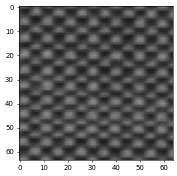

tf.Tensor(
[[[ 85.  85.  85.]
  [ 94.  94.  94.]
  [ 91.  91.  91.]
  ...
  [100. 100. 100.]
  [ 67.  67.  67.]
  [ 59.  59.  59.]]

 [[ 57.  57.  57.]
  [ 41.  41.  41.]
  [ 39.  39.  39.]
  ...
  [ 74.  74.  74.]
  [ 65.  65.  65.]
  [ 78.  78.  78.]]

 [[ 61.  61.  61.]
  [ 43.  43.  43.]
  [ 37.  37.  37.]
  ...
  [ 43.  43.  43.]
  [ 65.  65.  65.]
  [ 98.  98.  98.]]

 ...

 [[ 64.  64.  64.]
  [ 68.  68.  68.]
  [ 70.  70.  70.]
  ...
  [ 62.  62.  62.]
  [ 96.  96.  96.]
  [124. 124. 124.]]

 [[ 79.  79.  79.]
  [ 94.  94.  94.]
  [ 91.  91.  91.]
  ...
  [ 71.  71.  71.]
  [ 88.  88.  88.]
  [112. 112. 112.]]

 [[109. 109. 109.]
  [128. 128. 128.]
  [122. 122. 122.]
  ...
  [ 59.  59.  59.]
  [ 54.  54.  54.]
  [ 53.  53.  53.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


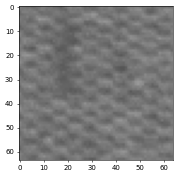

tf.Tensor(
[[[124. 124. 124.]
  [117. 117. 117.]
  [115. 115. 115.]
  ...
  [120. 120. 120.]
  [115. 115. 115.]
  [117. 117. 117.]]

 [[119. 119. 119.]
  [120. 120. 120.]
  [124. 124. 124.]
  ...
  [140. 140. 140.]
  [140. 140. 140.]
  [134. 134. 134.]]

 [[110. 110. 110.]
  [127. 127. 127.]
  [128. 128. 128.]
  ...
  [139. 139. 139.]
  [132. 132. 132.]
  [131. 131. 131.]]

 ...

 [[131. 131. 131.]
  [123. 123. 123.]
  [114. 114. 114.]
  ...
  [106. 106. 106.]
  [105. 105. 105.]
  [116. 116. 116.]]

 [[127. 127. 127.]
  [117. 117. 117.]
  [116. 116. 116.]
  ...
  [105. 105. 105.]
  [101. 101. 101.]
  [106. 106. 106.]]

 [[124. 124. 124.]
  [117. 117. 117.]
  [119. 119. 119.]
  ...
  [121. 121. 121.]
  [115. 115. 115.]
  [114. 114. 114.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


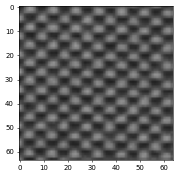

tf.Tensor(
[[[ 37.  37.  37.]
  [ 50.  50.  50.]
  [ 94.  94.  94.]
  ...
  [ 64.  64.  64.]
  [ 71.  71.  71.]
  [ 71.  71.  71.]]

 [[ 51.  51.  51.]
  [ 69.  69.  69.]
  [104. 104. 104.]
  ...
  [ 92.  92.  92.]
  [ 91.  91.  91.]
  [ 76.  76.  76.]]

 [[ 71.  71.  71.]
  [ 79.  79.  79.]
  [107. 107. 107.]
  ...
  [139. 139. 139.]
  [134. 134. 134.]
  [112. 112. 112.]]

 ...

 [[ 67.  67.  67.]
  [ 77.  77.  77.]
  [107. 107. 107.]
  ...
  [126. 126. 126.]
  [110. 110. 110.]
  [ 74.  74.  74.]]

 [[ 89.  89.  89.]
  [ 79.  79.  79.]
  [ 81.  81.  81.]
  ...
  [137. 137. 137.]
  [131. 131. 131.]
  [ 91.  91.  91.]]

 [[117. 117. 117.]
  [ 89.  89.  89.]
  [ 49.  49.  49.]
  ...
  [112. 112. 112.]
  [103. 103. 103.]
  [ 75.  75.  75.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


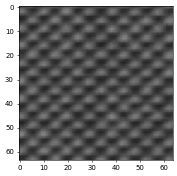

tf.Tensor(
[[[ 73.  73.  73.]
  [ 79.  79.  79.]
  [ 76.  76.  76.]
  ...
  [ 97.  97.  97.]
  [ 97.  97.  97.]
  [ 90.  90.  90.]]

 [[112. 112. 112.]
  [111. 111. 111.]
  [ 94.  94.  94.]
  ...
  [ 59.  59.  59.]
  [ 51.  51.  51.]
  [ 48.  48.  48.]]

 [[119. 119. 119.]
  [117. 117. 117.]
  [ 99.  99.  99.]
  ...
  [ 57.  57.  57.]
  [ 49.  49.  49.]
  [ 50.  50.  50.]]

 ...

 [[ 95.  95.  95.]
  [ 76.  76.  76.]
  [ 71.  71.  71.]
  ...
  [ 62.  62.  62.]
  [ 67.  67.  67.]
  [ 73.  73.  73.]]

 [[ 44.  44.  44.]
  [ 44.  44.  44.]
  [ 45.  45.  45.]
  ...
  [ 83.  83.  83.]
  [ 92.  92.  92.]
  [ 85.  85.  85.]]

 [[ 44.  44.  44.]
  [ 44.  44.  44.]
  [ 55.  55.  55.]
  ...
  [110. 110. 110.]
  [119. 119. 119.]
  [107. 107. 107.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


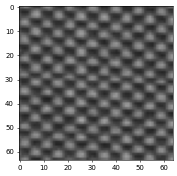

tf.Tensor(
[[[ 97.  97.  97.]
  [106. 106. 106.]
  [123. 123. 123.]
  ...
  [ 89.  89.  89.]
  [103. 103. 103.]
  [100. 100. 100.]]

 [[ 63.  63.  63.]
  [ 56.  56.  56.]
  [ 59.  59.  59.]
  ...
  [ 76.  76.  76.]
  [ 52.  52.  52.]
  [ 49.  49.  49.]]

 [[ 59.  59.  59.]
  [ 40.  40.  40.]
  [ 39.  39.  39.]
  ...
  [ 88.  88.  88.]
  [ 62.  62.  62.]
  [ 53.  53.  53.]]

 ...

 [[ 92.  92.  92.]
  [ 69.  69.  69.]
  [ 69.  69.  69.]
  ...
  [ 82.  82.  82.]
  [ 92.  92.  92.]
  [ 97.  97.  97.]]

 [[ 85.  85.  85.]
  [ 85.  85.  85.]
  [ 96.  96.  96.]
  ...
  [ 74.  74.  74.]
  [102. 102. 102.]
  [114. 114. 114.]]

 [[ 97.  97.  97.]
  [123. 123. 123.]
  [136. 136. 136.]
  ...
  [ 82.  82.  82.]
  [118. 118. 118.]
  [144. 144. 144.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


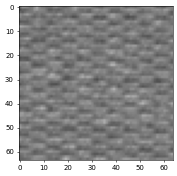

tf.Tensor(
[[[111. 111. 111.]
  [139. 139. 139.]
  [139. 139. 139.]
  ...
  [121. 121. 121.]
  [128. 128. 128.]
  [129. 129. 129.]]

 [[ 81.  81.  81.]
  [ 99.  99.  99.]
  [ 98.  98.  98.]
  ...
  [155. 155. 155.]
  [138. 138. 138.]
  [123. 123. 123.]]

 [[101. 101. 101.]
  [ 92.  92.  92.]
  [108. 108. 108.]
  ...
  [129. 129. 129.]
  [107. 107. 107.]
  [ 92.  92.  92.]]

 ...

 [[113. 113. 113.]
  [118. 118. 118.]
  [129. 129. 129.]
  ...
  [123. 123. 123.]
  [142. 142. 142.]
  [160. 160. 160.]]

 [[104. 104. 104.]
  [112. 112. 112.]
  [127. 127. 127.]
  ...
  [107. 107. 107.]
  [127. 127. 127.]
  [137. 137. 137.]]

 [[100. 100. 100.]
  [100. 100. 100.]
  [105. 105. 105.]
  ...
  [134. 134. 134.]
  [126. 126. 126.]
  [126. 126. 126.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


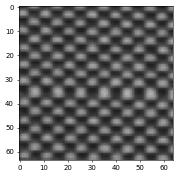

tf.Tensor(
[[[ 52.  52.  52.]
  [ 50.  50.  50.]
  [ 59.  59.  59.]
  ...
  [ 67.  67.  67.]
  [126. 126. 126.]
  [151. 151. 151.]]

 [[ 88.  88.  88.]
  [101. 101. 101.]
  [ 98.  98.  98.]
  ...
  [ 73.  73.  73.]
  [118. 118. 118.]
  [136. 136. 136.]]

 [[148. 148. 148.]
  [158. 158. 158.]
  [144. 144. 144.]
  ...
  [ 58.  58.  58.]
  [ 67.  67.  67.]
  [ 72.  72.  72.]]

 ...

 [[104. 104. 104.]
  [139. 139. 139.]
  [145. 145. 145.]
  ...
  [ 68.  68.  68.]
  [ 61.  61.  61.]
  [ 65.  65.  65.]]

 [[106. 106. 106.]
  [142. 142. 142.]
  [145. 145. 145.]
  ...
  [105. 105. 105.]
  [ 64.  64.  64.]
  [ 37.  37.  37.]]

 [[ 70.  70.  70.]
  [ 82.  82.  82.]
  [ 79.  79.  79.]
  ...
  [127. 127. 127.]
  [ 82.  82.  82.]
  [ 50.  50.  50.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


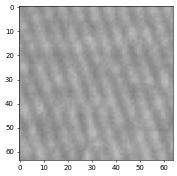

tf.Tensor(
[[[151. 151. 151.]
  [143. 143. 143.]
  [149. 149. 149.]
  ...
  [181. 181. 181.]
  [174. 174. 174.]
  [158. 158. 158.]]

 [[156. 156. 156.]
  [144. 144. 144.]
  [144. 144. 144.]
  ...
  [178. 178. 178.]
  [184. 184. 184.]
  [156. 156. 156.]]

 [[156. 156. 156.]
  [148. 148. 148.]
  [142. 142. 142.]
  ...
  [171. 171. 171.]
  [172. 172. 172.]
  [159. 159. 159.]]

 ...

 [[150. 150. 150.]
  [164. 164. 164.]
  [174. 174. 174.]
  ...
  [146. 146. 146.]
  [142. 142. 142.]
  [151. 151. 151.]]

 [[153. 153. 153.]
  [155. 155. 155.]
  [161. 161. 161.]
  ...
  [151. 151. 151.]
  [145. 145. 145.]
  [149. 149. 149.]]

 [[140. 140. 140.]
  [148. 148. 148.]
  [150. 150. 150.]
  ...
  [152. 152. 152.]
  [145. 145. 145.]
  [142. 142. 142.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


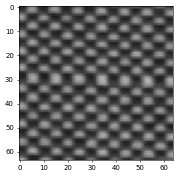

tf.Tensor(
[[[ 31.  31.  31.]
  [ 31.  31.  31.]
  [ 48.  48.  48.]
  ...
  [ 68.  68.  68.]
  [ 61.  61.  61.]
  [ 56.  56.  56.]]

 [[ 43.  43.  43.]
  [ 47.  47.  47.]
  [ 63.  63.  63.]
  ...
  [104. 104. 104.]
  [100. 100. 100.]
  [103. 103. 103.]]

 [[ 78.  78.  78.]
  [ 77.  77.  77.]
  [ 73.  73.  73.]
  ...
  [121. 121. 121.]
  [150. 150. 150.]
  [156. 156. 156.]]

 ...

 [[ 63.  63.  63.]
  [ 65.  65.  65.]
  [ 62.  62.  62.]
  ...
  [102. 102. 102.]
  [143. 143. 143.]
  [157. 157. 157.]]

 [[ 99.  99.  99.]
  [ 90.  90.  90.]
  [ 75.  75.  75.]
  ...
  [102. 102. 102.]
  [131. 131. 131.]
  [147. 147. 147.]]

 [[157. 157. 157.]
  [159. 159. 159.]
  [127. 127. 127.]
  ...
  [ 87.  87.  87.]
  [ 94.  94.  94.]
  [ 95.  95.  95.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


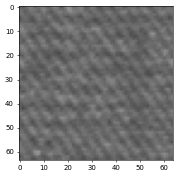

tf.Tensor(
[[[104. 104. 104.]
  [ 91.  91.  91.]
  [ 99.  99.  99.]
  ...
  [108. 108. 108.]
  [114. 114. 114.]
  [106. 106. 106.]]

 [[110. 110. 110.]
  [106. 106. 106.]
  [ 99.  99.  99.]
  ...
  [117. 117. 117.]
  [119. 119. 119.]
  [114. 114. 114.]]

 [[116. 116. 116.]
  [107. 107. 107.]
  [ 95.  95.  95.]
  ...
  [111. 111. 111.]
  [114. 114. 114.]
  [114. 114. 114.]]

 ...

 [[102. 102. 102.]
  [107. 107. 107.]
  [110. 110. 110.]
  ...
  [128. 128. 128.]
  [111. 111. 111.]
  [114. 114. 114.]]

 [[ 82.  82.  82.]
  [101. 101. 101.]
  [117. 117. 117.]
  ...
  [121. 121. 121.]
  [106. 106. 106.]
  [102. 102. 102.]]

 [[100. 100. 100.]
  [ 97.  97.  97.]
  [105. 105. 105.]
  ...
  [107. 107. 107.]
  [ 97.  97.  97.]
  [ 92.  92.  92.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


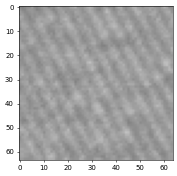

tf.Tensor(
[[[136. 136. 136.]
  [130. 130. 130.]
  [137. 137. 137.]
  ...
  [167. 167. 167.]
  [144. 144. 144.]
  [142. 142. 142.]]

 [[147. 147. 147.]
  [135. 135. 135.]
  [134. 134. 134.]
  ...
  [163. 163. 163.]
  [159. 159. 159.]
  [146. 146. 146.]]

 [[157. 157. 157.]
  [146. 146. 146.]
  [138. 138. 138.]
  ...
  [169. 169. 169.]
  [173. 173. 173.]
  [149. 149. 149.]]

 ...

 [[164. 164. 164.]
  [167. 167. 167.]
  [157. 157. 157.]
  ...
  [145. 145. 145.]
  [159. 159. 159.]
  [161. 161. 161.]]

 [[161. 161. 161.]
  [164. 164. 164.]
  [158. 158. 158.]
  ...
  [146. 146. 146.]
  [157. 157. 157.]
  [157. 157. 157.]]

 [[155. 155. 155.]
  [155. 155. 155.]
  [147. 147. 147.]
  ...
  [147. 147. 147.]
  [156. 156. 156.]
  [158. 158. 158.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


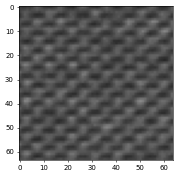

tf.Tensor(
[[[ 61.  61.  61.]
  [ 55.  55.  55.]
  [ 56.  56.  56.]
  ...
  [ 54.  54.  54.]
  [ 68.  68.  68.]
  [ 89.  89.  89.]]

 [[ 65.  65.  65.]
  [ 69.  69.  69.]
  [ 72.  72.  72.]
  ...
  [ 65.  65.  65.]
  [ 77.  77.  77.]
  [ 92.  92.  92.]]

 [[ 67.  67.  67.]
  [ 80.  80.  80.]
  [ 89.  89.  89.]
  ...
  [ 86.  86.  86.]
  [ 81.  81.  81.]
  [ 82.  82.  82.]]

 ...

 [[ 74.  74.  74.]
  [ 98.  98.  98.]
  [115. 115. 115.]
  ...
  [ 85.  85.  85.]
  [ 90.  90.  90.]
  [ 78.  78.  78.]]

 [[ 64.  64.  64.]
  [ 82.  82.  82.]
  [ 96.  96.  96.]
  ...
  [ 77.  77.  77.]
  [ 64.  64.  64.]
  [ 56.  56.  56.]]

 [[ 74.  74.  74.]
  [ 80.  80.  80.]
  [ 85.  85.  85.]
  ...
  [ 73.  73.  73.]
  [ 63.  63.  63.]
  [ 63.  63.  63.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


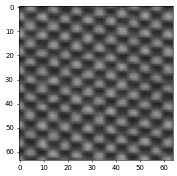

tf.Tensor(
[[[ 48.  48.  48.]
  [ 43.  43.  43.]
  [ 82.  82.  82.]
  ...
  [ 40.  40.  40.]
  [ 40.  40.  40.]
  [ 49.  49.  49.]]

 [[ 72.  72.  72.]
  [ 70.  70.  70.]
  [ 87.  87.  87.]
  ...
  [ 62.  62.  62.]
  [ 64.  64.  64.]
  [ 71.  71.  71.]]

 [[100. 100. 100.]
  [ 88.  88.  88.]
  [ 80.  80.  80.]
  ...
  [ 91.  91.  91.]
  [102. 102. 102.]
  [ 95.  95.  95.]]

 ...

 [[ 64.  64.  64.]
  [ 65.  65.  65.]
  [ 92.  92.  92.]
  ...
  [ 78.  78.  78.]
  [ 66.  66.  66.]
  [ 73.  73.  73.]]

 [[ 96.  96.  96.]
  [ 84.  84.  84.]
  [ 76.  76.  76.]
  ...
  [110. 110. 110.]
  [106. 106. 106.]
  [ 96.  96.  96.]]

 [[138. 138. 138.]
  [118. 118. 118.]
  [ 72.  72.  72.]
  ...
  [149. 149. 149.]
  [152. 152. 152.]
  [113. 113. 113.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


In [31]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 50

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(0, len(images)):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.show()
        print(images[i])
        print(labels[i])
        print("-----------------------------")
    

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])



In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        3

In [35]:
epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size = 32,

)

Epoch 1/15
159/159 [==============================] - 31s 162ms/step - loss: 0.5152 - accuracy: 0.7470 - val_loss: 0.3905 - val_accuracy: 0.7797
Epoch 2/15
159/159 [==============================] - 17s 109ms/step - loss: 0.4316 - accuracy: 0.7715 - val_loss: 0.3073 - val_accuracy: 0.8397
Epoch 3/15
159/159 [==============================] - 25s 156ms/step - loss: 0.3954 - accuracy: 0.7950 - val_loss: 0.2825 - val_accuracy: 0.8676
Epoch 4/15
159/159 [==============================] - 17s 105ms/step - loss: 0.3159 - accuracy: 0.8614 - val_loss: 0.2664 - val_accuracy: 0.8831
Epoch 5/15
159/159 [==============================] - 17s 104ms/step - loss: 0.2399 - accuracy: 0.9024 - val_loss: 0.1353 - val_accuracy: 0.9545
Epoch 6/15
159/159 [==============================] - 17s 106ms/step - loss: 0.1606 - accuracy: 0.9431 - val_loss: 0.1350 - val_accuracy: 0.9669
Epoch 7/15
159/159 [==============================] - 24s 152ms/step - loss: 0.1219 - accuracy: 0.9562 - val_loss: 0.0978 - val_ac

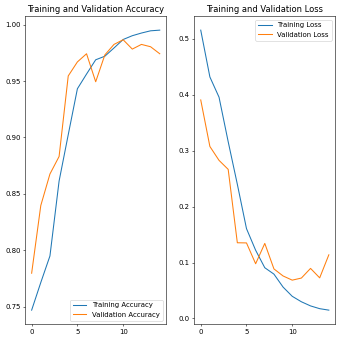

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))

18/18 [==============================] - 2s 65ms/step - loss: 0.1904 - accuracy: 0.9556


{'loss': 0.19039161503314972, 'accuracy': 0.9555950164794922}

In [38]:
# cwd = os.getcwd()
model.save("inspection_model")
#model.save_weights("inspection_weights")

INFO:tensorflow:Assets written to: inspection_model\assets


In [39]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
  ]
)

In [40]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])



In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)       

In [42]:
epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size = 32,

)

Epoch 1/15
159/159 [==============================] - 29s 173ms/step - loss: 0.5225 - accuracy: 0.7492 - val_loss: 0.3985 - val_accuracy: 0.7766
Epoch 2/15
159/159 [==============================] - 26s 166ms/step - loss: 0.4520 - accuracy: 0.7715 - val_loss: 0.3595 - val_accuracy: 0.7808
Epoch 3/15
159/159 [==============================] - 20s 128ms/step - loss: 0.3853 - accuracy: 0.8132 - val_loss: 0.2132 - val_accuracy: 0.9183
Epoch 4/15
159/159 [==============================] - 26s 163ms/step - loss: 0.2743 - accuracy: 0.8902 - val_loss: 0.2373 - val_accuracy: 0.8800
Epoch 5/15
159/159 [==============================] - 28s 179ms/step - loss: 0.1678 - accuracy: 0.9384 - val_loss: 0.1399 - val_accuracy: 0.9566
Epoch 6/15
159/159 [==============================] - 23s 143ms/step - loss: 0.1251 - accuracy: 0.9599 - val_loss: 0.0971 - val_accuracy: 0.9721
Epoch 7/15
159/159 [==============================] - 22s 138ms/step - loss: 0.0952 - accuracy: 0.9686 - val_loss: 0.0861 - val_ac

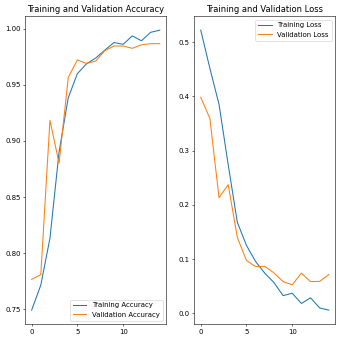

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
model.save("inspection_model_aug")


INFO:tensorflow:Assets written to: inspection_model_aug\assets


In [45]:
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))

18/18 [==============================] - 1s 68ms/step - loss: 0.1579 - accuracy: 0.9840


{'loss': 0.1579403579235077, 'accuracy': 0.9840142130851746}

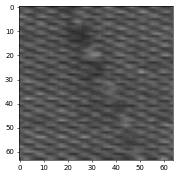

CNN output: [[0.05279475]]
This image most likely belongs to defect with a 94.72 percent confidence.
inference took: 0.12866680001025088 ms


In [62]:
path = "C:/Users/schof/LeedsUni/personalproject/test_data/defect/defect_0.png"

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 


img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")

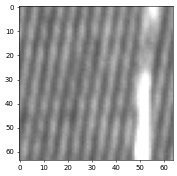

CNN output: [[1.7431757e-10]]
This image most likely belongs to defect with a 100.00 percent confidence.
inference took: 0.12866680001025088 ms


In [63]:
path = "C:/Users/schof/LeedsUni/personalproject/test_data/defect/defect_1.png"

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 


img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")

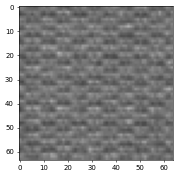

CNN output: [[0.999997]]
This image most likely belongs to normal with a 100.00 percent confidence.
inference took: 0.12866680001025088 ms


In [64]:
path = "C:/Users/schof/LeedsUni/personalproject/test_data/normal/normal_0.png"

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")

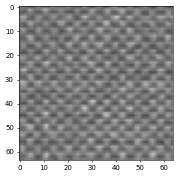

CNN output: [[0.9999999]]
This image most likely belongs to normal with a 100.00 percent confidence.
inference took: 0.12866680001025088 ms


In [65]:
path = "C:/Users/schof/LeedsUni/personalproject/test_data/normal/normal_1.png"


cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)

p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")

In [66]:
# dad got an accarcy of 93% on inspections machines without ai

In [67]:
# loading 


reconstructed_model = keras.models.load_model("inspection_model")


In [68]:

result = reconstructed_model.evaluate(test_ds)

dict(zip(reconstructed_model.metrics_names, result))

18/18 [==============================] - 2s 69ms/step - loss: 0.1904 - accuracy: 0.9556


{'loss': 0.19039161503314972, 'accuracy': 0.9555950164794922}

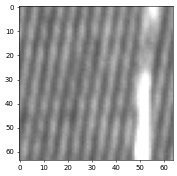

CNN output: [[3.79795e-07]]
This image most likely belongs to defect with a 100.00 percent confidence.
inference took: 0.35061369999311864 ms


In [69]:
path = "C:/Users/schof/LeedsUni/personalproject/test_data/defect/defect_1.png"

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 


img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

start = time.perf_counter()
predictions = reconstructed_model.predict(img_array)
timeTaken = time.perf_counter() - start

# score = tf.nn.sigmoid(predictions[0])

p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")